In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *


Observations:  1391


<Axes: xlabel='Time'>

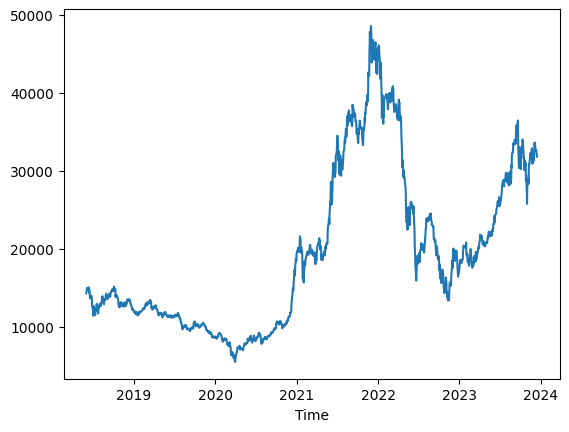

In [38]:
#2. Fetch data and visualize
SSI = stock_historical_data(symbol = "SSI", start_date="2018-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(SSI['Close']))
SSI
SSI["Close"].plot()

In [47]:
# Preprocessing
SSI['Time feature'] = np.arange(len(SSI.index))
SSI['Lag_1'] = SSI['Close'].shift(1)
SSI

SSI = pd.DataFrame(SSI)
SSI = SSI[['Close', 'Volume', 'Lag_1', 'Time feature']]
SSI = SSI.dropna()
SSI

,Close,Volume,Lag_1,Time feature
Time,,,,
2018-06-04,14730,5630880,14270.0,1
2018-06-05,14770,6196020,14730.0,2
2018-06-06,14950,4421630,14770.0,3
2018-06-07,14700,5372030,14950.0,4
2018-06-08,14990,4475060,14700.0,5
...,...,...,...,...
2023-12-11,32700,19996900,32600.0,1386
2023-12-12,32600,12453800,32700.0,1387
2023-12-13,32000,21549400,32600.0,1388


Text(0.5, 1.0, 'Lag Plot of Price')

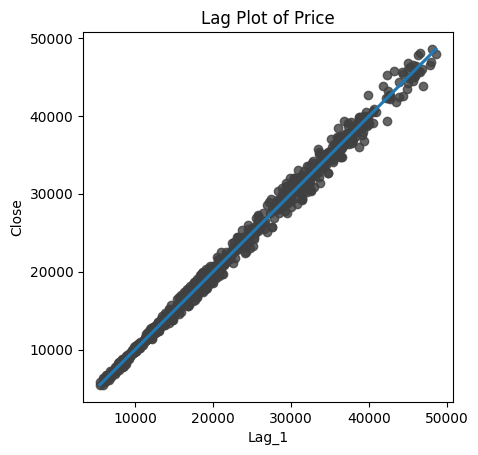

In [48]:
import seaborn as sns 
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Close', data=SSI, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Price')

In [49]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.8 * len(SSI))
test_size = int(0.2 * len(SSI))

train_data = SSI[:train_size]
test_data = SSI[train_size:]

In [56]:
#4. Training process
x_lab = ["Time feature", "Lag_1", "Volume"]
y_lab = ["Close"]

x_train = train_data[x_lab]
y_train = train_data[y_lab]
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [59]:
# 5. Testing process
x_test = test_data[x_lab]
y_test = test_data[y_lab]
y_pred = model.predict(x_test)
y_pred

array([[14363.34704515],
       [14375.53137994],
       [13423.41245416],
       [13629.96880855],
       [13807.72740658],
       [13497.38502579],
       [14376.83237226],
       [15400.87253345],
       [15599.36849118],
       [15638.19236064],
       [15705.01434383],
       [15208.74543258],
       [15464.16289225],
       [16625.85244086],
       [17728.66764991],
       [18369.0647384 ],
       [18735.8718026 ],
       [17647.57362378],
       [18911.4965241 ],
       [20265.07589584],
       [18858.33495562],
       [18709.14353241],
       [19788.0948827 ],
       [19581.47736154],
       [18512.39154478],
       [19670.57666915],
       [19327.19866947],
       [19528.09889446],
       [19978.62963275],
       [19822.96484421],
       [19151.02177266],
       [18533.24068388],
       [18325.45523823],
       [17633.35042744],
       [16310.04072397],
       [16725.15242858],
       [17453.43051474],
       [17380.15909817],
       [16827.33462365],
       [17048.07522062],


In [ ]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)
y_pred

In [5]:
#4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 6. 60 days prediction
last_index =  SSI.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

array([[30285.43146851],
       [30307.14515598],
       [30328.85884346],
       [30350.57253093],
       [30372.28621841],
       [30393.99990588],
       [30415.71359336],
       [30437.42728083],
       [30459.14096831],
       [30480.85465578],
       [30502.56834326],
       [30524.28203074],
       [30545.99571821],
       [30567.70940569],
       [30589.42309316],
       [30611.13678064],
       [30632.85046811],
       [30654.56415559],
       [30676.27784306],
       [30697.99153054],
       [30719.70521801],
       [30741.41890549],
       [30763.13259296],
       [30784.84628044],
       [30806.55996791],
       [30828.27365539],
       [30849.98734286],
       [30871.70103034],
       [30893.41471782],
       [30915.12840529],
       [30936.84209277],
       [30958.55578024],
       [30980.26946772],
       [31001.98315519],
       [31023.69684267],
       [31045.41053014],
       [31067.12421762],
       [31088.83790509],
       [31110.55159257],
       [31132.26528004],


In [7]:
# 6. 60 days prediction
last_index =  SSI.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[[36343.55027412]
 [36365.2639616 ]
 [36386.97764907]
 [36408.69133655]
 [36430.40502402]
 [36452.1187115 ]
 [36473.83239897]
 [36495.54608645]
 [36517.25977392]
 [36538.9734614 ]
 [36560.68714887]
 [36582.40083635]
 [36604.11452383]
 [36625.8282113 ]
 [36647.54189878]
 [36669.25558625]
 [36690.96927373]
 [36712.6829612 ]
 [36734.39664868]
 [36756.11033615]
 [36777.82402363]
 [36799.5377111 ]
 [36821.25139858]
 [36842.96508605]
 [36864.67877353]
 [36886.392461  ]
 [36908.10614848]
 [36929.81983596]
 [36951.53352343]
 [36973.24721091]
 [36994.96089838]
 [37016.67458586]
 [37038.38827333]
 [37060.10196081]
 [37081.81564828]
 [37103.52933576]
 [37125.24302323]
 [37146.95671071]
 [37168.67039818]
 [37190.38408566]
 [37212.09777313]
 [37233.81146061]
 [37255.52514809]
 [37277.23883556]
 [37298.95252304]
 [37320.66621051]
 [37342.37989799]
 [37364.09358546]
 [37385.80727294]
 [37407.52096041]
 [37429.23464789]
 [37450.94833536]
 [37472.66202284]

In [8]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 9789.693606992483
Testing MAPE: 42.56001105072279
Testing MAE: 8774.51841248507


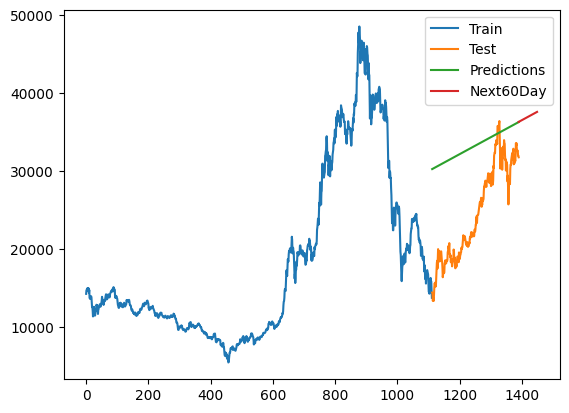

In [9]:
# 8.Visualize the result
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()